<a href="https://colab.research.google.com/github/Fabiojeronymo/Analise_Vendas_Ecommerce/blob/main/Analise_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas e limpeza dos dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/archive.zip', compression='zip')
df.head()

,Order_ID,Order_Date,Customer_Name,City,State,Region,Country,Category,Sub_Category,Product_Name,Quantity,Unit_Price,Revenue,Profit
0,1,08-23-23,Bianca Brown,Jackson,Mississippi,South,United States,Accessories,Small Electronics,Phone Case,3,201.01,603.03,221.49
1,2,12-20-24,Jared Edwards,Grand Rapids,Michigan,Centre,United States,Accessories,Small Electronics,Charging Cable,4,74.30,297.20,97.09
2,3,01-29-24,Susan Valdez,Minneapolis,Minnesota,Centre,United States,Clothing & Apparel,Sportswear,Nike Air Force 1,1,68.19,68.19,25.47
3,4,11-29-24,Tina Williams,Tallahassee,Florida,South,United States,Clothing & Apparel,Sportswear,Adidas Tracksuit,3,209.64,628.92,231.38
4,5,09-21-23,Catherine Gordon,Baltimore,Maryland,East,United States,Accessories,Bags,Backpack,1,216.63,216.63,42.46


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       200000 non-null  int64  
 1   Order_Date     200000 non-null  object 
 2   Customer_Name  200000 non-null  object 
 3   City           200000 non-null  object 
 4   State          200000 non-null  object 
 5   Region         200000 non-null  object 
 6   Country        200000 non-null  object 
 7   Category       200000 non-null  object 
 8   Sub_Category   200000 non-null  object 
 9   Product_Name   200000 non-null  object 
 10  Quantity       200000 non-null  int64  
 11   Unit_Price    200000 non-null  float64
 12   Revenue       200000 non-null  float64
 13   Profit        200000 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 21.4+ MB


In [4]:
# informações iniciais do df

print(f'Linhas e colunas: {df.shape}')
print(f'\n\nDuplicatas: {df.duplicated().sum()}')
print(f'\n\nNulas: {df.isnull().sum()}')

Linhas e colunas: (200000, 14)


Duplicatas: 0


Nulas: Order_ID         0
Order_Date       0
Customer_Name    0
City             0
State            0
Region           0
Country          0
Category         0
Sub_Category     0
Product_Name     0
Quantity         0
 Unit_Price      0
 Revenue         0
 Profit          0
dtype: int64


In [5]:
df.describe()

,Order_ID,Quantity,Unit_Price,Revenue,Profit
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,1.854000,382.855615,712.038725,157.743041
std,57735.171256,1.100536,276.870235,742.471556,155.689581
min,1.000000,1.000000,17.030000,17.030000,3.920000
25%,50000.750000,1.000000,162.760000,229.187500,59.210000
50%,100000.500000,1.000000,303.545000,464.880000,109.530000
75%,150000.250000,2.000000,562.252500,881.302500,199.402500
max,200000.000000,11.000000,1432.000000,9014.250000,2763.720000


In [6]:
df = df.drop(['Order_ID'], axis=1)

In [7]:
df.columns

Index(['Order_Date', 'Customer_Name', 'City', 'State', 'Region', 'Country',
       'Category', 'Sub_Category', 'Product_Name', 'Quantity', ' Unit_Price ',
       ' Revenue ', ' Profit '],
      dtype='object')

In [8]:
columns_rename = {
    "Order_Date":"Data da compra", "Customer_Name":"Nome do Cliente", "City":"Cidade", "State":"Estado", "Region":"Regiao",
    "Country":"Pais", "Category":"Categoria", "Sub_Category":"SubCategoria", "Product_Name": "Nome do Produto",
    "Quantity":"Quantidade", " Unit_Price ":"Preco Unitario", " Revenue ":"Valor Total", " Profit ":"Lucro"
}

df = df.rename(columns=(columns_rename))

In [9]:
df['Data da compra'] = pd.to_datetime(df['Data da compra'], format='%m-%d-%y')

# Estrutura e resumo dos dados

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Data da compra   200000 non-null  datetime64[ns]
 1   Nome do Cliente  200000 non-null  object        
 2   Cidade           200000 non-null  object        
 3   Estado           200000 non-null  object        
 4   Regiao           200000 non-null  object        
 5   Pais             200000 non-null  object        
 6   Categoria        200000 non-null  object        
 7   SubCategoria     200000 non-null  object        
 8   Nome do Produto  200000 non-null  object        
 9   Quantidade       200000 non-null  int64         
 10  Preco Unitario   200000 non-null  float64       
 11  Valor Total      200000 non-null  float64       
 12  Lucro            200000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 19.8+ 

In [11]:
# Quantas linhas e colunas tem
print(f'São {df.shape} (linhas / colunas)')
# Valores nulos
print(f'\n\nTem {df.isnull().sum().sum()} nulos')
# Intervalo de datas
print(f'\n\nDiferença do intervalo de datas : {(df["Data da compra"].max() - df["Data da compra"].min()).days} dias')
# Duplicatas
print(f'\n\nDuplicatas: {df.duplicated().sum()}')

São (200000, 13) (linhas / colunas)


Tem 0 nulos


Diferença do intervalo de datas : 730 dias


Duplicatas: 0


# Vendas e lucro

In [12]:
df.head()

,Data da compra,Nome do Cliente,Cidade,Estado,Regiao,Pais,Categoria,SubCategoria,Nome do Produto,Quantidade,Preco Unitario,Valor Total,Lucro
0,2023-08-23,Bianca Brown,Jackson,Mississippi,South,United States,Accessories,Small Electronics,Phone Case,3,201.01,603.03,221.49
1,2024-12-20,Jared Edwards,Grand Rapids,Michigan,Centre,United States,Accessories,Small Electronics,Charging Cable,4,74.30,297.20,97.09
2,2024-01-29,Susan Valdez,Minneapolis,Minnesota,Centre,United States,Clothing & Apparel,Sportswear,Nike Air Force 1,1,68.19,68.19,25.47
3,2024-11-29,Tina Williams,Tallahassee,Florida,South,United States,Clothing & Apparel,Sportswear,Adidas Tracksuit,3,209.64,628.92,231.38
4,2023-09-21,Catherine Gordon,Baltimore,Maryland,East,United States,Accessories,Bags,Backpack,1,216.63,216.63,42.46


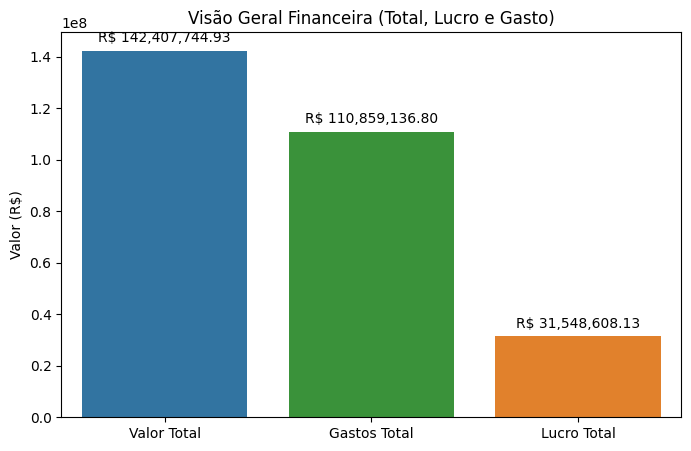

In [13]:
# Qual foi o valor total de vendas e o lucro total
valor_vendas_total = df['Valor Total'].sum()
lucro_vendas_total = df['Lucro'].sum()
gastos_total = valor_vendas_total - lucro_vendas_total

data_grafico = {
    'Metrica': ['Valor Total', 'Lucro Total', 'Gastos Total'],
    'Valor': [valor_vendas_total, lucro_vendas_total, gastos_total]
}
df_grafico = pd.DataFrame(data_grafico)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_grafico, x='Metrica', y='Valor', hue='Metrica', order=['Valor Total', 'Gastos Total', 'Lucro Total'])

# Adicionar rótulos de dados (opcional, mas recomendado)
for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('Visão Geral Financeira (Total, Lucro e Gasto)')
plt.ylabel('Valor (R$)')
plt.xlabel('')
plt.show()

In [14]:
import plotly.graph_objects as go

valor_vendas_total = df['Valor Total'].sum()
lucro_vendas_total = df['Lucro'].sum()
gasto_total = valor_vendas_total - lucro_vendas_total

fig = go.Figure(go.Waterfall(
    name = "Demonstrativo",
    orientation = "v",
    x = ['Vendas Totais', 'Custos/Gastos', 'Lucro Líquido'],
    y = [valor_vendas_total, -gasto_total, lucro_vendas_total],
    measure = ['absolute', 'relative', 'total']
))

fig.update_layout(
    title = "Demonstrativo de Lucro",
    yaxis_title="Valor (R$)",
    showlegend = False
)

fig.show()

In [15]:
# Qual é o ticket médio (valor médio por compra)?
ticket_medio = df['Valor Total'].mean()
print(f'O valor médio por compra é de {ticket_medio:.2f}')

O valor médio por compra é de 712.04


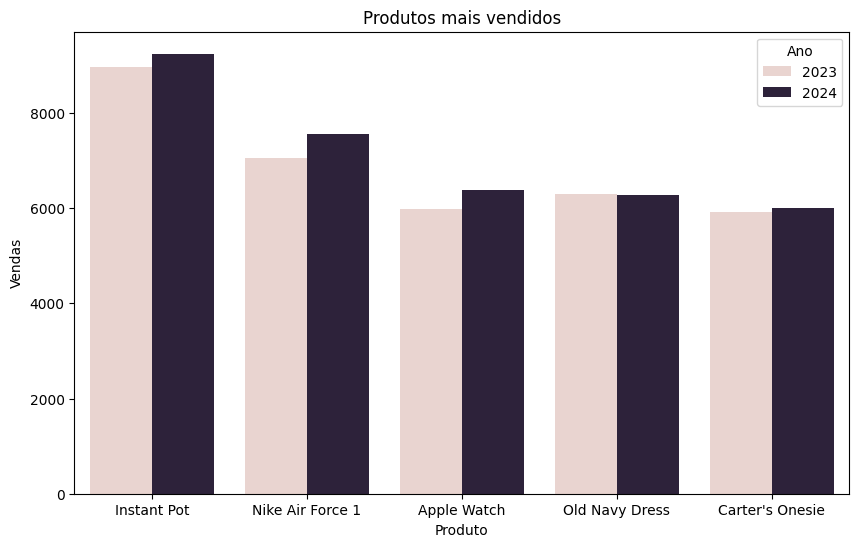

In [16]:
# Qual foi o produto mais vendido em quantidade?
produtos_mais_vendido = df.groupby([df['Data da compra'].dt.year, df['Nome do Produto']])['Quantidade'].sum() \
                          .reset_index() \
                          .sort_values(by='Quantidade', ascending=False) \
                          .rename(columns={"Data da compra":"Ano"})

plt.figure(figsize=(10, 6))
ax = sns.barplot(produtos_mais_vendido.head(10), x='Nome do Produto', y='Quantidade', hue='Ano')
plt.title('Produtos mais vendidos')
plt.xlabel('Produto')
plt.ylabel('Vendas')
plt.show()

In [17]:
# Qual foi o produto com maior lucro total?
produto_mais_rentavel = df.groupby(['Nome do Produto'])['Lucro'].sum().reset_index().sort_values(by='Lucro', ascending=False)
display(produto_mais_rentavel.head().style.format({
    "Lucro": "R$ {:,.2f}"
}))

,Nome do Produto,Lucro
38,Tempur-Pedic Mattress,"R$ 2,134,208.80"
21,Instant Pot,"R$ 1,689,924.16"
27,Nike Air Force 1,"R$ 1,128,698.91"
36,Storage Rack,"R$ 1,052,179.55"
26,MacBook Air,"R$ 1,028,767.59"


In [18]:
analise_produtos = df.groupby('Nome do Produto').agg(
    Lucro_Total = ('Lucro', 'sum'),
    Contagem_Vendas = ('Quantidade', 'sum'),
    Faturamento_Total = ('Valor Total', 'sum')
).reset_index()

analise_produtos['Preco_Medio_Venda'] = analise_produtos['Faturamento_Total'] / analise_produtos['Contagem_Vendas']

print('\n\nOrdenado por Faturamento')
display(analise_produtos.sort_values('Faturamento_Total', ascending=False).head(10).style.format({
    "Faturamento_Total": "R$ {:,.2f}",
    "Lucro_Total": "R$ {:,.2f}",
    "Preco_Medio_Venda": "R$ {:,.2f}"
}))

print('\n\nOrdenado por Vendas')
display(analise_produtos.sort_values('Contagem_Vendas', ascending=False).head(10).style.format({
    "Faturamento_Total": "R$ {:,.2f}",
    "Lucro_Total": "R$ {:,.2f}",
    "Preco_Medio_Venda": "R$ {:,.2f}"
}))



Ordenado por Faturamento


,Nome do Produto,Lucro_Total,Contagem_Vendas,Faturamento_Total,Preco_Medio_Venda
38,Tempur-Pedic Mattress,"R$ 2,134,208.80",10333,"R$ 9,061,755.86",R$ 876.97
21,Instant Pot,"R$ 1,689,924.16",18200,"R$ 8,903,475.26",R$ 489.20
26,MacBook Air,"R$ 1,028,767.59",8763,"R$ 7,362,516.81",R$ 840.18
1,Apple Watch,"R$ 957,992.87",12368,"R$ 6,834,472.35",R$ 552.59
2,Apple iPhone 14,"R$ 808,671.16",7642,"R$ 5,740,819.18",R$ 751.22
48,iPad Pro,"R$ 781,602.78",10075,"R$ 5,574,458.89",R$ 553.30
22,KitchenAid Mixer,"R$ 944,239.08",9831,"R$ 4,989,740.69",R$ 507.55
36,Storage Rack,"R$ 1,052,179.55",9394,"R$ 4,463,941.27",R$ 475.19
7,Brooklinen Sheets,"R$ 933,904.24",8242,"R$ 3,981,027.44",R$ 483.02
33,Samsung Galaxy S23,"R$ 542,627.11",6974,"R$ 3,851,240.02",R$ 552.23




Ordenado por Vendas


,Nome do Produto,Lucro_Total,Contagem_Vendas,Faturamento_Total,Preco_Medio_Venda
21,Instant Pot,"R$ 1,689,924.16",18200,"R$ 8,903,475.26",R$ 489.20
27,Nike Air Force 1,"R$ 1,128,698.91",14611,"R$ 3,452,321.38",R$ 236.28
30,Old Navy Dress,"R$ 960,337.85",12571,"R$ 2,944,197.28",R$ 234.21
1,Apple Watch,"R$ 957,992.87",12368,"R$ 6,834,472.35",R$ 552.59
8,Carter's Onesie,"R$ 907,369.41",11924,"R$ 2,773,675.04",R$ 232.61
28,Nike Running Shoes,"R$ 839,269.74",10935,"R$ 2,582,972.17",R$ 236.21
31,Phone Case,"R$ 544,161.64",10629,"R$ 1,603,120.11",R$ 150.83
38,Tempur-Pedic Mattress,"R$ 2,134,208.80",10333,"R$ 9,061,755.86",R$ 876.97
0,Adidas Tracksuit,"R$ 766,612.16",10221,"R$ 2,361,174.55",R$ 231.01
47,Zara Blouse,"R$ 772,118.07",10095,"R$ 2,383,290.34",R$ 236.09


In [19]:
# Mais e menos lucrativo produto
df['Margem de Lucro'] = df['Lucro']/df['Valor Total']
margem_lucro_produto = df.groupby(['Nome do Produto'])['Margem de Lucro'].sum().sort_values(ascending=False).reset_index()
first = margem_lucro_produto.iloc[0]
last = margem_lucro_produto.iloc[-1]
print(f'Produto mais lucrativo foi o {first['Nome do Produto']}, R${round(first['Margem de Lucro'],2)}')
print(f'\n\nProduto menos lucrativo foi o {last['Nome do Produto']}, R${round(last['Margem de Lucro'],2)}')


Produto mais lucrativo foi o Nike Air Force 1, R$2315.77


Produto menos lucrativo foi o Google Pixel 7, R$201.58


In [20]:
# O lucro médio por produto é alto ou baixo em relação ao preço de venda
margem_media = df['Margem de Lucro'].mean() * 100
print(f'A margem média é de {round(margem_media,2)}%')

A margem média é de 25.77%


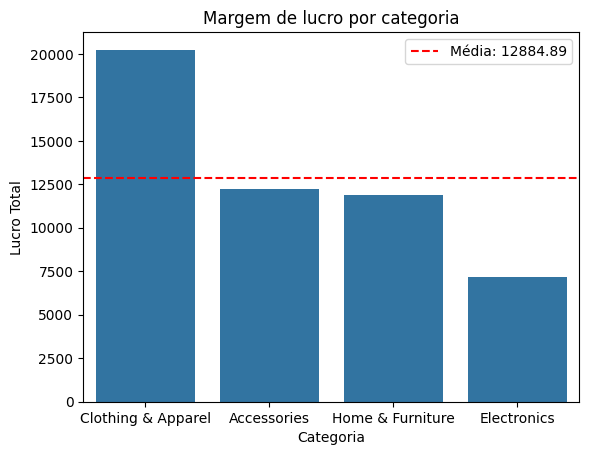

In [21]:
# Margem de lucro por categoria
margem_lucro_categoria = df.groupby(['Categoria'])['Margem de Lucro'].sum().sort_values(ascending=False).reset_index()
margem_lucro_categoria

media_lucro = margem_lucro_categoria['Margem de Lucro'].mean()

ax = sns.barplot(margem_lucro_categoria, x='Categoria', y='Margem de Lucro')
ax.axhline(y=media_lucro,
           color='red',
           linestyle='--',
           label=f'Média: {media_lucro:.2f}')
ax.legend()
plt.title('Margem de lucro por categoria')
plt.xlabel('Categoria')
plt.ylabel('Lucro Total')
plt.show()

# Clientes

In [36]:
# Qual cliente comprou mais vezes
df['qtd'] = 1
clientes_mais_comprou = df.groupby(['Nome do Cliente'])['qtd'].sum().reset_index().sort_values(by='qtd', ascending=False)
df = df.drop(['qtd'], axis=1)
clientes_mais_comprou.head()


,Nome do Cliente,qtd
81824,Michael Smith,102
81436,Michael Johnson,77
81943,Michael Williams,70
23442,Christopher Smith,69
29982,David Smith,69


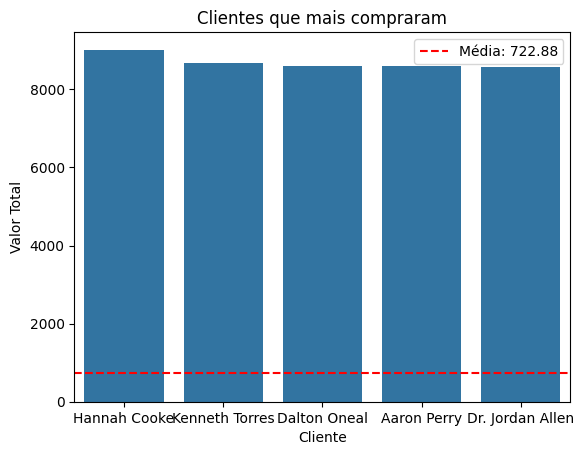

In [42]:
# Qual cliente gerou o maior valor total
cliente_mais_gastou = df.groupby(['Nome do Cliente','Regiao','Cidade'])['Valor Total'].sum().reset_index().sort_values(by='Valor Total', ascending=False)

media_cliente_gastos = cliente_mais_gastou['Valor Total'].mean()

ax = sns.barplot(cliente_mais_gastou.head(), x='Nome do Cliente', y='Valor Total')
ax.axhline(y=media_cliente_gastos,
           color='red',
           linestyle='--',
           label=f'Média: {media_cliente_gastos:.2f}')
ax.legend()
plt.title('Clientes que mais compraram')
plt.xlabel('Cliente')
plt.ylabel('Valor Total')
plt.show()

In [24]:
cliente_mais_gastou = df.groupby(['Nome do Cliente','Regiao', 'Cidade'])['Valor Total'].sum().reset_index().sort_values(by='Valor Total', ascending=False)
display(cliente_mais_gastou.head().style.format({
    "Valor Total": "R$ {:,.2f}"
}))

,Nome do Cliente,Regiao,Cidade,Valor Total
68199,Hannah Cooke,Centre,Springfield,"R$ 9,014.25"
107656,Kenneth Torres,East,Dover,"R$ 8,674.17"
42605,Dalton Oneal,West,Salt Lake City,"R$ 8,600.69"
456,Aaron Perry,West,Los Angeles,"R$ 8,586.41"
55671,Dr. Jordan Allen,South,Miami,"R$ 8,564.64"


Temos varias pessoas com o mesmo nome, como n temos um identificador unico, estou analisando usando cidade e região para diferenciar eles

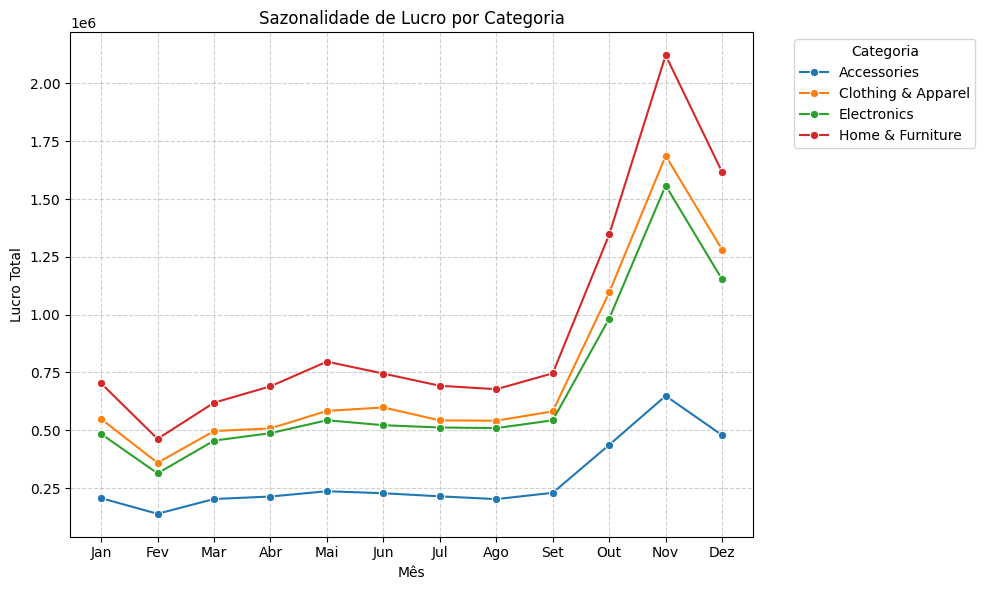

In [25]:
# Existe sazonalidade por categoria (ex: eletrônicos vendem mais em dezembro)?
sazonalidade_produto = df.groupby([df['Data da compra'].dt.month, df['Categoria']])['Lucro'] \
                       .sum() \
                       .reset_index() \
                       .rename(columns={"Data da compra":"Mês"})

plt.figure(figsize=(10,6))
meses_nomes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
               'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
ax = sns.lineplot(sazonalidade_produto, x='Mês', y='Lucro', hue='Categoria', marker='o')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(meses_nomes)
plt.title('Sazonalidade de Lucro por Categoria')
plt.xlabel('Mês')
plt.ylabel('Lucro Total')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Categorias e regiões

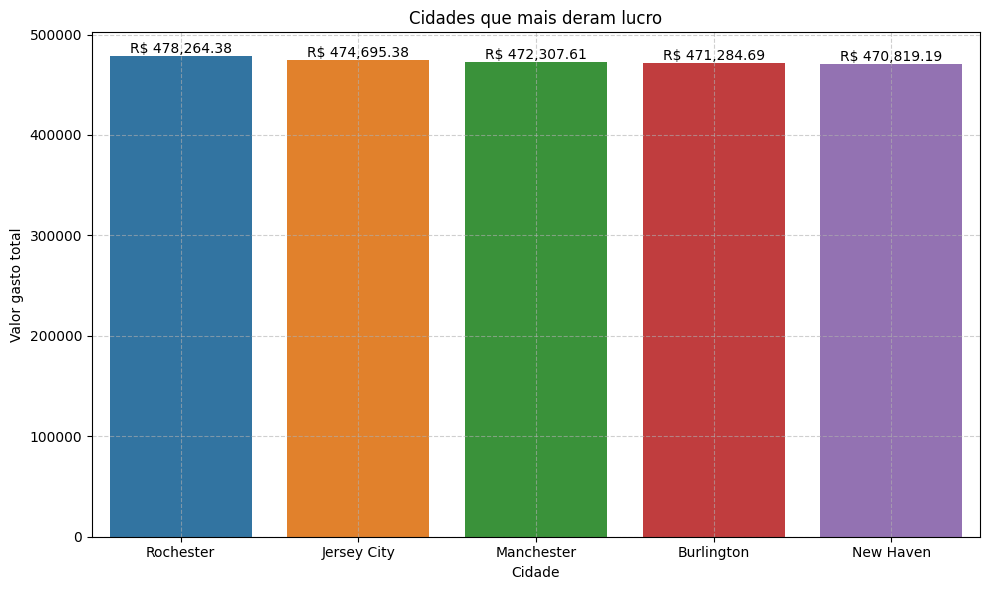

In [75]:
# Olhando para os clientes que mais gastaram, de onde eles são?
import matplotlib.ticker as ticker
custom_palette = ["#48D1CC", "#00FF00", "#D2691E", "#DA70D6"]

# E em qual estado houve o maior lucro médio por venda?
cidades_mais_lucrativas = df.groupby(['Cidade'])['Lucro'].sum().reset_index().sort_values(by='Lucro', ascending=False)


plt.figure(figsize=(10,6))

ax = sns.barplot(cidades_mais_lucrativas.head(5), x='Cidade', y='Lucro', hue='Cidade')

for p in ax.patches:
    height = p.get_height()
    label_text = f'R$ {height:,.2f}'
    ax.annotate(
        text=label_text,
        xy=(p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('Cidades que mais deram lucro')
plt.xlabel('Cidade')
plt.ylabel('Valor gasto total')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [27]:
# Qual categoria gerou mais vendas?
categoria_mais_vendido = df.groupby(['Categoria'])['Quantidade'].sum().reset_index().sort_values(by='Quantidade', ascending=False)
categoria_mais_vendido

,Categoria,Quantidade
1,Clothing & Apparel,115523
2,Electronics,97115
3,Home & Furniture,90403
0,Accessories,67759


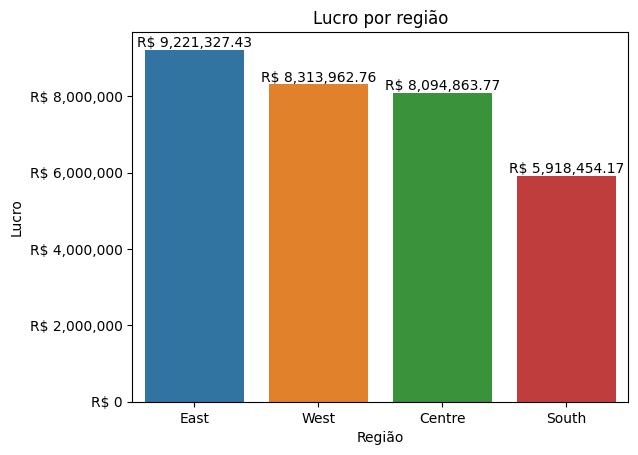

In [76]:
# Em qual região teve o maior lucro
regiao_com_mais_vendas = df.groupby(['Regiao'])['Lucro'].sum().reset_index().sort_values(by='Lucro', ascending=False)

color_dict = {'East': '#e34c42', 'West': '#4dc471', 'Centre': '#3b71db', 'South': '#ffa500'}

ax = sns.barplot(regiao_com_mais_vendas, x='Regiao', y='Lucro', hue='Regiao')
formatter = ticker.StrMethodFormatter('R$ {x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

for p in ax.patches:
    height = p.get_height()

    label_text = f'R$ {height:,.2f}'

    ax.annotate(
        text=label_text,
        xy=(p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('Lucro por região')
plt.xlabel('Região')
plt.ylabel('Lucro')
plt.show()

In [77]:
# E em qual estado houve o maior lucro médio por venda?
lucro_medio_estado = df.groupby(['Estado'])['Lucro'].mean().reset_index().sort_values(by='Lucro', ascending=False)
display(lucro_medio_estado.head().style.format({
    "Lucro": "R$ {:,.2f}"
}))

,Estado,Lucro
31,Ohio,R$ 166.67
10,Illinois,R$ 165.30
13,Kansas,R$ 164.74
45,Wisconsin,R$ 164.05
30,North Dakota,R$ 163.58


# Sazonalidade

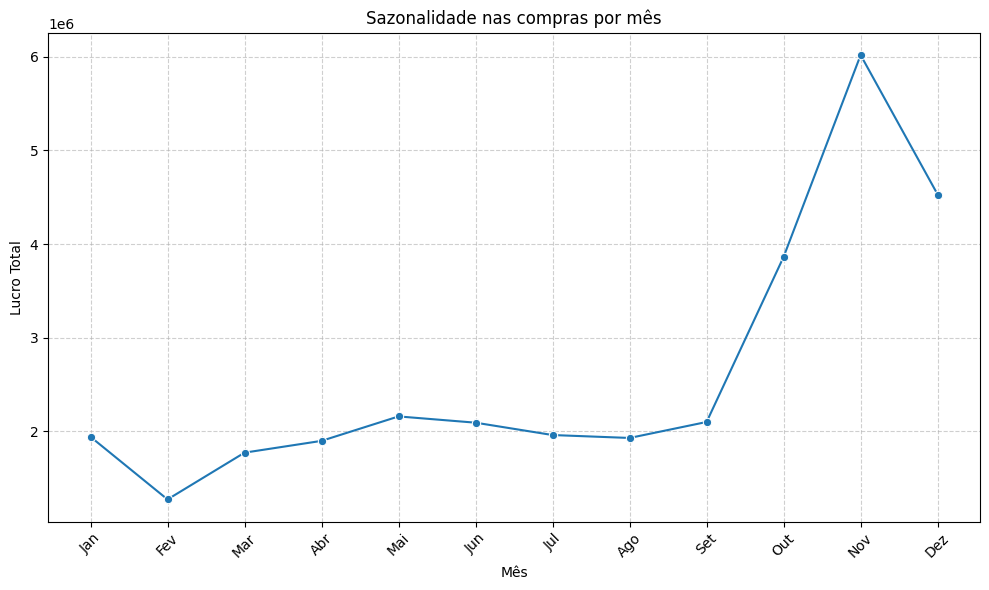

In [30]:
# Há sazonalidade nas compras (por mês ou por ano)
# Mês
maior_sazonalidade_mes = df.groupby(df['Data da compra'].dt.month)['Lucro'] \
                       .sum() \
                       .reset_index() \
                       .rename(columns={"Data da compra":"Mês"})

plt.figure(figsize=(10,6))
ax = sns.lineplot(maior_sazonalidade_mes, x='Mês', y='Lucro', marker='o')
meses_nomes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
               'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
ax.set_xticks(range(1, 13))
ax.set_xticklabels(meses_nomes, rotation=45)
plt.title('Sazonalidade nas compras por mês')
plt.xlabel('Mês')
plt.ylabel('Lucro Total')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [31]:
maior_sazonalidade_ano = df.groupby(df['Data da compra'].dt.year)['Lucro'] \
                       .sum() \
                       .reset_index() \
                       .sort_values(by='Lucro', ascending=False) \
                       .rename(columns={"Data da compra":"Ano"})
maior_sazonalidade_ano.reset_index(drop=True, inplace=True)
display(maior_sazonalidade_ano.head().style.format({
    "Lucro": "R$ {:,.2f}"
}))

,Ano,Lucro
0,2024,"R$ 15,869,646.14"
1,2023,"R$ 15,678,961.99"


In [32]:
# Fim de semana lucra mais que dia normal?

import numpy as np

df['Tipo de Dia'] = df['Data da compra'].dt.dayofweek.apply(lambda x: 'Final de Semana' if x >= 5 else 'Dia de Semana')
lucro_por_tipo_dia = df.groupby('Tipo de Dia')['Lucro'].sum().reset_index().sort_values('Lucro', ascending=False)
display(lucro_por_tipo_dia.style.format({
    "Lucro": "R$ {:,.2f}"
}))

,Tipo de Dia,Lucro
0,Dia de Semana,"R$ 21,888,154.48"
1,Final de Semana,"R$ 9,660,453.65"


In [33]:
# Quais os dias mais lucrativos?

maior_sazonalidade_dia = df.groupby(df['Data da compra'].dt.day)['Lucro'] \
                       .sum() \
                       .reset_index() \
                       .sort_values(by='Lucro', ascending=False) \
                       .rename(columns={"Data da compra":"dia"})
maior_sazonalidade_dia.reset_index(drop=True, inplace=True)
display(maior_sazonalidade_dia.head(6).style.format({
    "Lucro": "R$ {:,.2f}"
}))

,dia,Lucro
0,1,"R$ 1,117,241.79"
1,24,"R$ 1,104,453.70"
2,22,"R$ 1,092,650.86"
3,27,"R$ 1,088,472.51"
4,4,"R$ 1,080,274.32"
5,3,"R$ 1,076,845.11"
